## AIDL_03 Project - Terrorism Analysis Worldwide and particularly in Greece - EDA Dataset

                                  Γεώργιος Τσαρούχας  (mscaidl-0051)

                                               ΕΙΣΑΓΩΓΗ              

Η παρούσα ανάλυση δεδομένων πραγματοποιήθηκε στο σύνολο δεδομένων "Global Terrorism Database". Το σύνολο δεδομένων περιλαμβάνει περίπου 180.000 τρομοκρατικά χτυπήματα από όλο τον κόσμο, τα οποία έγιναν από το 1970 έως και το 2017. 
Στόχος της ανάλυσης είναι να μας παρέχει μια περιεκτική κατανόηση της φύσης των χτυπημάτων, καθώς και να αναδείξει μοτίβα, τάσεις και πρότυπα στα υπάρχοντα δεδομένα. Μέσω της ανάλυσης θα προσπαθήσουμε να απαντήσουμε μια σειρά ερωτημάτων, αρχικά σε παγκόσμιο επίπεδο και στη συνέχεια θα επικεντρωθούμε στα τρομοκρατικά χτυπήματα που έγιναν στην Ελλάδα. 
Εξερευνώντας τα δεδομένα μας θα απαντήσουμε στα εξής ερωτήματα: ποιες είναι οι πιο σημαντικές τρομοκρατικές οργανώσεις σε παγκόσμιο και εγχώριο επίπεδο. Τι οπλισμό και μεθόδους χρησιμοποιούν οι οργανώσεις, σε τι στόχους επικεντρώνεται η δράση τους καθώς και την πορεία τους μέσα στο χρόνο. Θα προσπαθήσουμε επίσης με τη βοήθεια γραφημάτων, να απαντήσουμε στις γενεσιουργές αιτίες των επιθέσεων και να αποτυπώσουμε σε χάρτες τα σημεία των επιθέσεων.  

In [1]:
                                                                                                                                                                                                                                                                                                                                                                                                        #import libraries
import pandas as pd 
import numpy as np

In [2]:
#import dataset 
terror = pd.read_csv("C:\\Users\\georg\\Desktop\\AIDL NOTES\\AIDL_03\\data\\globalterrorismdb_0718dist.csv", encoding='ISO-8859-1', low_memory=False)

In [7]:
cd "C:\Users\georg\Desktop\AIDL NOTES\AIDL_03"

C:\Users\georg\Desktop\AIDL NOTES\AIDL_03


## Exploratory Data Analysis

In [3]:
terror.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [4]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
terror.shape

(181691, 135)

In [6]:
terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [8]:
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['Casualities']=terror['Killed']+terror['Wounded']
terror.head(3)

Year  Month  Day             Country                       Region  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   
2  1970      1    0         Philippines               Southeast Asia   

            city   latitude   longitude                   AttackType  Killed  \
0  Santo Domingo  18.456792  -69.951164                Assassination     1.0   
1    Mexico city  19.371887  -99.086624  Hostage Taking (Kidnapping)     0.0   
2        Unknown  15.478598  120.599741                Assassination     1.0   

   Wounded                   Target Summary  \
0      0.0             Julio Guzman     NaN   
1      0.0  Nadine Chaval, daughter     NaN   
2      0.0                 Employee     NaN   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   

  Weapon_type Motive  Casualities  
0     Unknown    NaN          1.0  
1     Unknown    NaN          0.0  
2     Unknown    NaN          1.0

In [9]:
terror.isnull().sum()


Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
Casualities     16874
dtype: int64

In [10]:
print('Country with Highest Terrorist Attacks:',terror['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terror['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terror['Killed'].max(),'that took place in',terror.loc[terror['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


In [11]:
terror['Country'].value_counts().head(20)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

In [12]:
terror['city'].value_counts().head(30)

Unknown           9775
Baghdad           7589
Karachi           2652
Lima              2359
Mosul             2265
Belfast           2171
Santiago          1621
Mogadishu         1581
San Salvador      1558
Istanbul          1048
Athens            1019
Bogota             984
Kirkuk             925
Beirut             918
Medellin           848
Benghazi           840
Peshawar           819
Quetta             803
Guatemala City     755
Baqubah            745
Kabul              738
Srinagar           658
Jerusalem          636
Paris              612
Fallujah           582
Tripoli            565
Dhaka              557
Rome               551
Arish              521
Ramadi             509
Name: city, dtype: int64

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

C:\Users\georg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


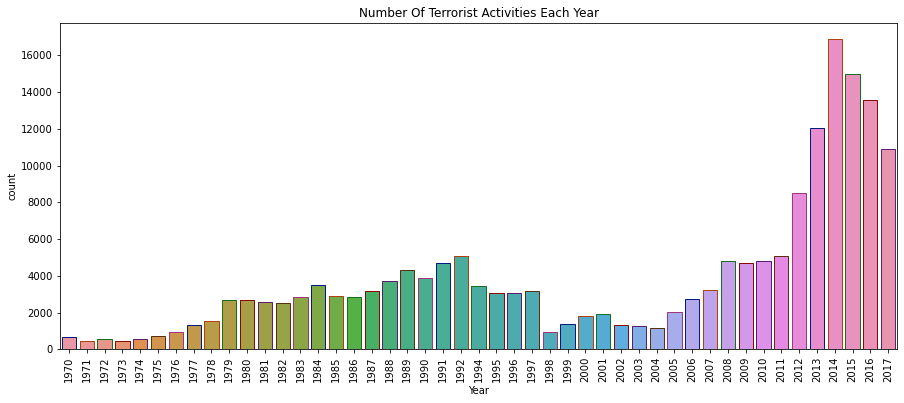

In [14]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror,edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

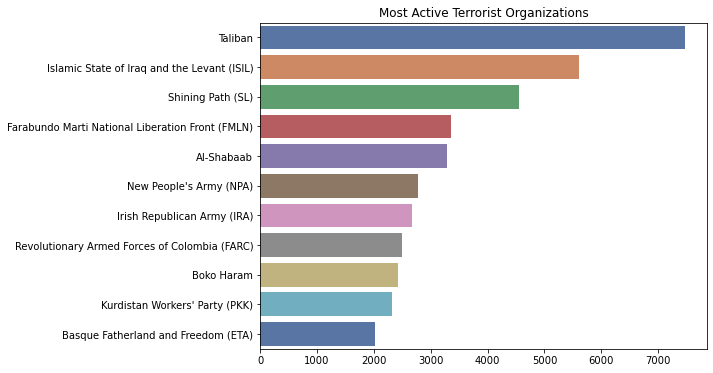

In [15]:
plt.subplots(figsize=(8,6))
sns.barplot(y=terror['Group'].value_counts()[1:12].index,x=terror['Group'].value_counts()[1:12].values,palette='deep')
plt.title('Most Active Terrorist Organizations')
plt.show()

C:\Users\georg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


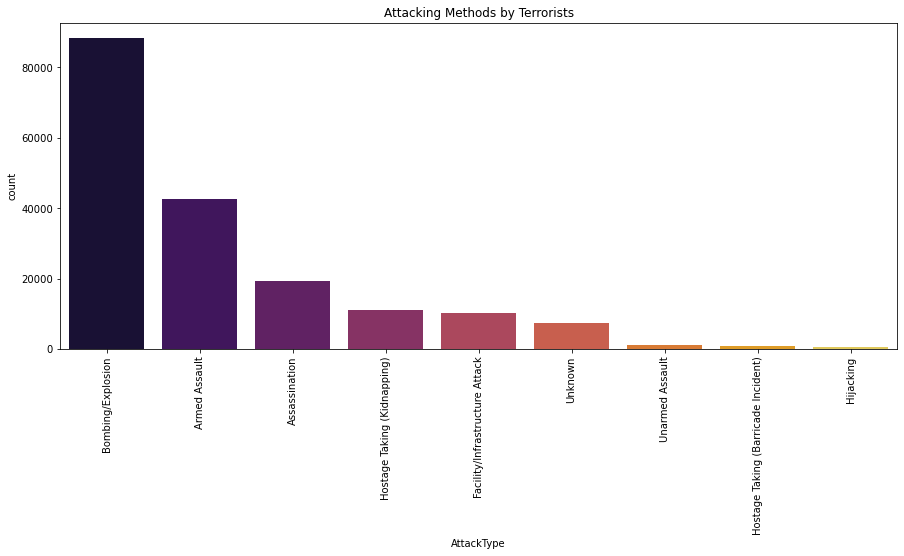

In [16]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=terror,palette='inferno',order=terror['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

In [17]:
import plotly.express as px
#Making a new column called AttackCount which is the sum of each type of terrorist attack and adding it to dataframe
terror['AttackCount'] = terror.AttackType.groupby(terror.AttackType).transform('count')

#Creating new Dataframe to get only Attack Type and AttackCount and dropping duplicates from Attack Type
terror1 = terror.copy()
terror2 = terror1[['AttackType','AttackCount']]
terror3 = terror2.drop_duplicates(keep='first')

#Pie Chart
fig = px.pie(terror3, values="AttackCount",
             names="AttackType",title='Terrorist Attack Types',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()


C:\Users\georg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



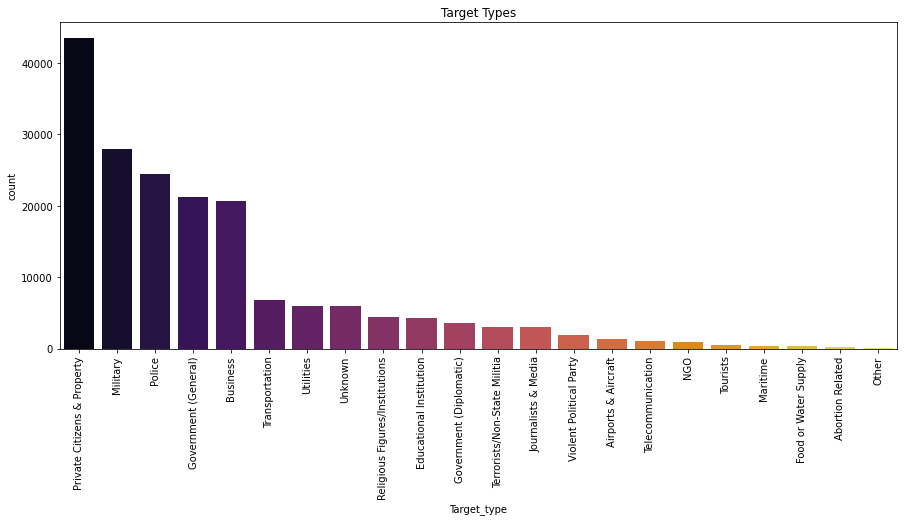

In [18]:
plt.subplots(figsize=(15,6))
sns.countplot('Target_type',data=terror,palette='inferno',order=terror['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Target Types')
plt.show()

C:\Users\georg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



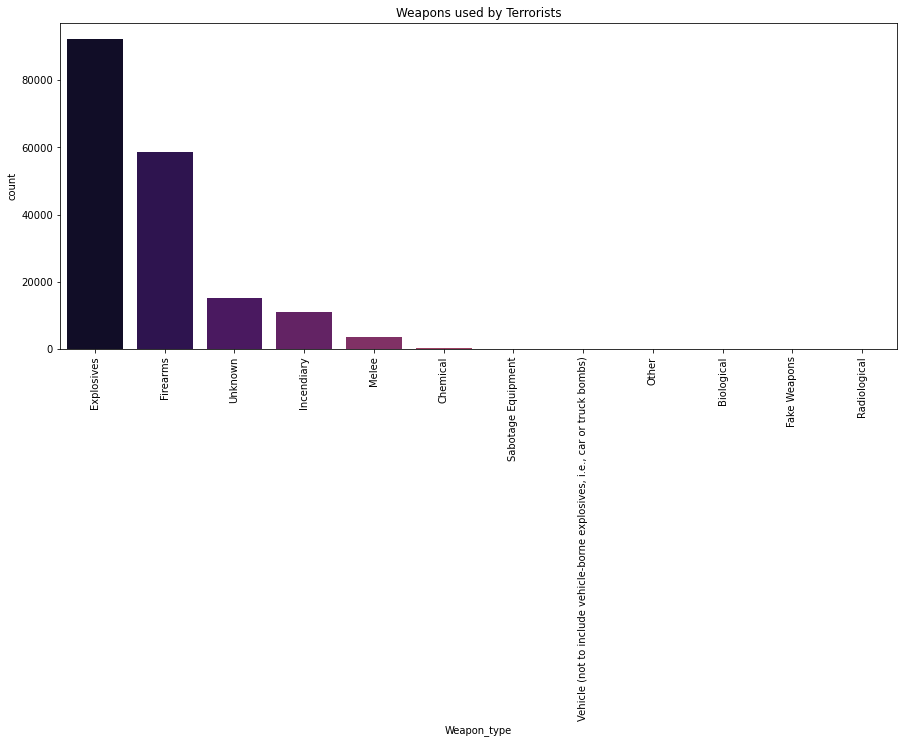

In [19]:
plt.subplots(figsize=(15,6))
sns.countplot('Weapon_type',data=terror,palette='inferno',order=terror['Weapon_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Weapons used by Terrorists')
plt.show()

## Terrorism by Region

C:\Users\georg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



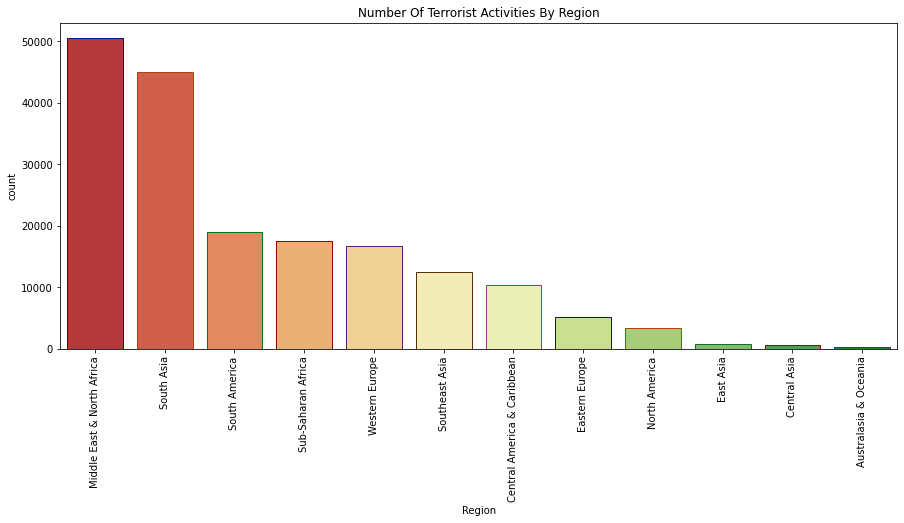

In [20]:
plt.subplots(figsize=(15,6))
sns.countplot('Region',data=terror,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=terror['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

Trend in Terrorist Activities

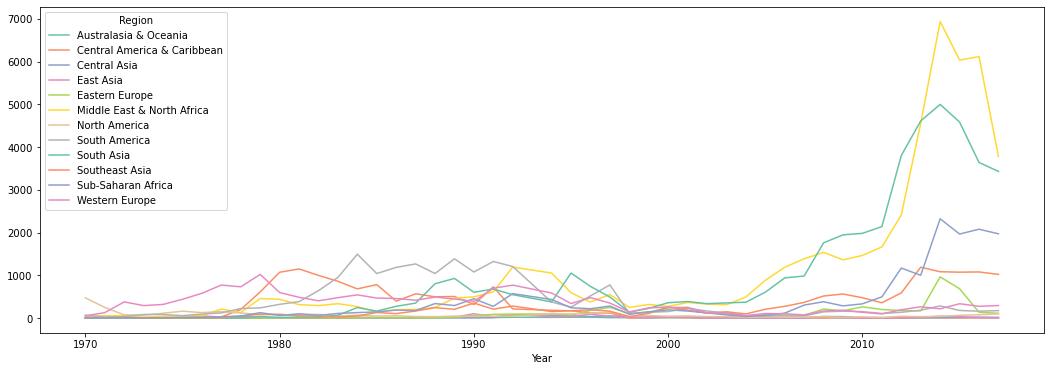

In [21]:
terror_region=pd.crosstab(terror.Year,terror.Region)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

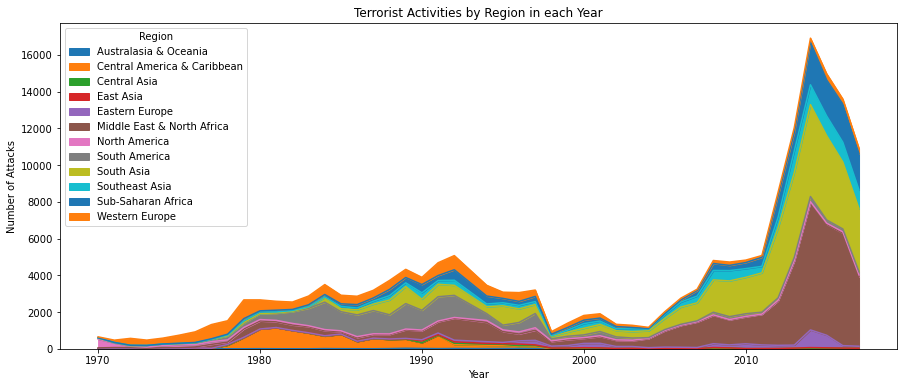

In [22]:
pd.crosstab(terror.Year, terror.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

Όπως φαίνεται στο διάγραμμα, με την πάροδο του χρόνου,έχουμε μια αύξηση στις τρομοκρατικές επιθέσεις στη Μέση Ανατολή, στη Βόρεια Αφρική και στη Νότια Ασία.                                                                                                                                                                                                                                                                                                                                                         







Types of Attack in Each Region

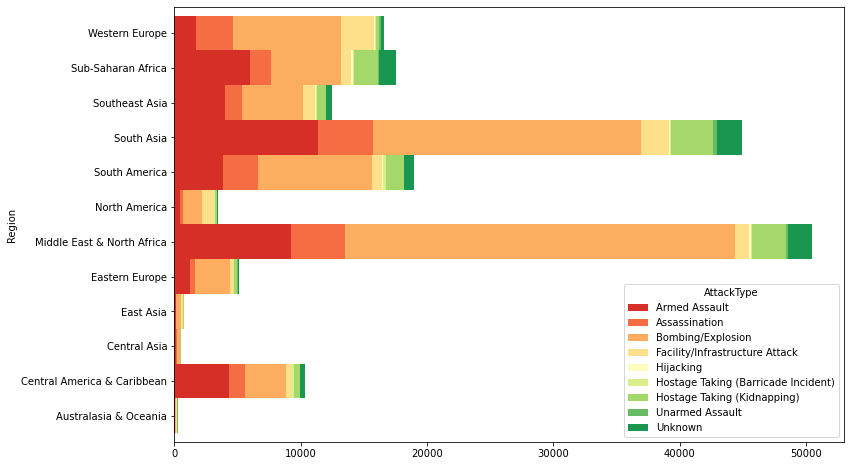

In [23]:
pd.crosstab(terror.Region,terror.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

C:\Users\georg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



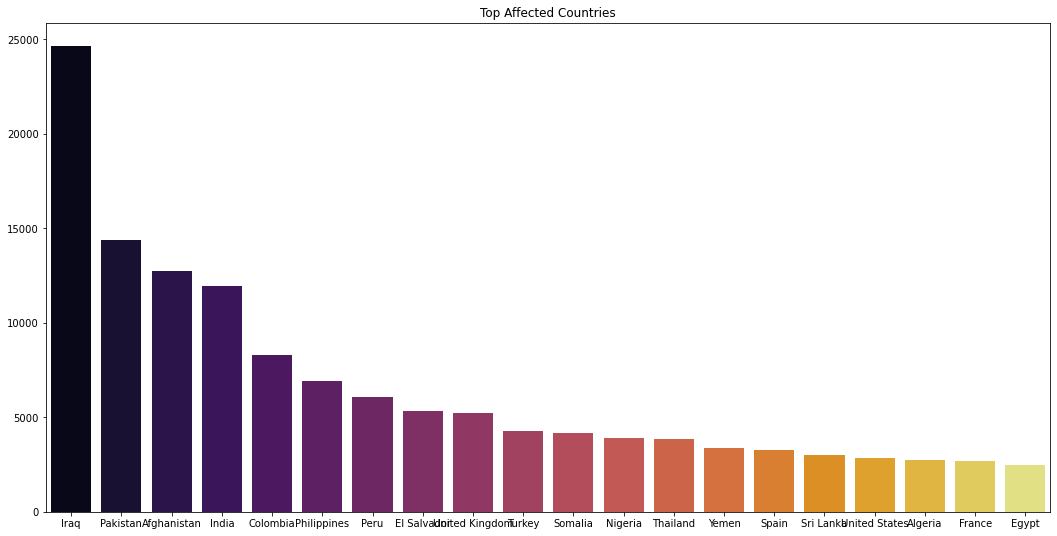

In [24]:
plt.subplots(figsize=(18,9))
sns.barplot(terror['Country'].value_counts()[:20].index,terror['Country'].value_counts()[:20].values,palette='inferno')
plt.title('Top Affected Countries')
plt.show()

## Terrorism in Greece

In [25]:
#Making a new dataframe particularly for terrorist attacks commited in Greece. 
terror_gr = terror[terror['Country'] == 'Greece'] 
terror_gr.head(10)

Year  Month  Day Country          Region      city   latitude  \
3     1970      1    0  Greece  Western Europe    Athens  37.997490   
421   1970      7   22  Greece  Western Europe    Athens  37.997490   
490   1970      9    2  Greece  Western Europe    Athens  37.997490   
882   1971      5   15  Greece  Western Europe  Kalamaki  37.742578   
1463  1972      8   29  Greece  Western Europe    Athens  37.997490   
1650  1972     12    7  Greece  Western Europe    Athens  37.997490   
1698  1973      1    7  Greece  Western Europe    Athens  37.997490   
1699  1973      1    7  Greece  Western Europe    Athens  37.997490   
1738  1973      2    2  Greece  Western Europe    Athens  37.997490   
1805  1973      3   22  Greece  Western Europe    Athens  37.997490   

      longitude         AttackType  Killed  Wounded  \
3     23.762728  Bombing/Explosion     NaN      NaN   
421   23.762728          Hijacking     0.0      0.0   
490   23.762728  Bombing/Explosion     2.0      0.0   
882   20.896502      Armed Assault     0.0      0.0   
1463  23.762728  Bombing/Explosion     0.0      0.0   
1650  23.762728      Armed Assault     0.0      0.0   
1698  23.762728      Armed Assault     0.0      0.0   
1699  23.762728      Armed Assault     0.0      0.0   
1738  23.762728      Armed Assault     0.0      0.0   
1805  23.762728  Bombing/Explosion     0.0      0.0   

                                             Target Summary  \
3                                      U.S. Embassy     NaN   
421                                   passenger jet     NaN   
490                                   U.S. Chancery     NaN   
882                      Vehicle of U.S. Serviceman     NaN   
1463                                     US embassy     NaN   
1650          U.S. servicemens vehicle (2 vehicles)     NaN   
1698                    vehicle, U.S. Govt Employee     NaN   
1699                                  U.S. vehicles     NaN   
1738                                       vehicles     NaN   
1805  Vehicle, U.S. Govt employee (private vehicle)     NaN   

                                                  Group  \
3                                               Unknown   
421                                               Arabs   
490                                             Unknown   
882                                             Unknown   
1463             Popular Revolutionary Resistance Group   
1650  Resistance, Liberation and Independence Organi...   
1698                                            Unknown   
1699                                            Unknown   
1738                                            Unknown   
1805                 Greek Anti-Dictatorial Youth (EAN)   

                      Target_type Weapon_type Motive  Casualities  AttackCount  
3         Government (Diplomatic)  Explosives    NaN          NaN        88255  
421           Airports & Aircraft    Firearms    NaN          0.0          659  
490       Government (Diplomatic)  Explosives    NaN          2.0        88255  
882                      Military  Incendiary    NaN          0.0        42669  
1463      Government (Diplomatic)  Explosives    NaN          0.0        88255  
1650                     Military  Incendiary    NaN          0.0        42669  
1698         Government (General)  Incendiary    NaN          0.0        42669  
1699  Private Citizens & Property  Incendiary    NaN          0.0        42669  
1738                     Military  Incendiary    NaN          0.0        42669  
1805         Government (General)  Explosives    NaN          0.0        88255

In [26]:
terror_gr.shape

(1275, 19)

In [27]:
print('Maximum people killed in an attack are:',terror_gr['Killed'].max(),'that took place in',terror_gr.loc[terror_gr['Killed'].idxmax()].Country)
print('Details about the attack:')
display(terror.loc[terror_gr['Killed'].idxmax()].to_frame())

Maximum people killed in an attack are: 88.0 that took place in Greece
Details about the attack:


2531
Year                                                      1974
Month                                                        9
Day                                                          8
Country                                                 Greece
Region                                          Western Europe
city                                                    Athens
latitude                                              37.99749
longitude                                            23.762728
AttackType                                   Bombing/Explosion
Killed                                                    88.0
Wounded                                                    0.0
Target            Boing 707 Acft en route Tel Aviv to New York
Summary                                                    NaN
Group        Popular Front for the Liberation of Palestine,...
Target_type                                Airports & Aircraft
Weapon_type                                         Explosives
Motive                                                     NaN
Casualities                                               88.0
AttackCount                                              88255

C:\Users\georg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



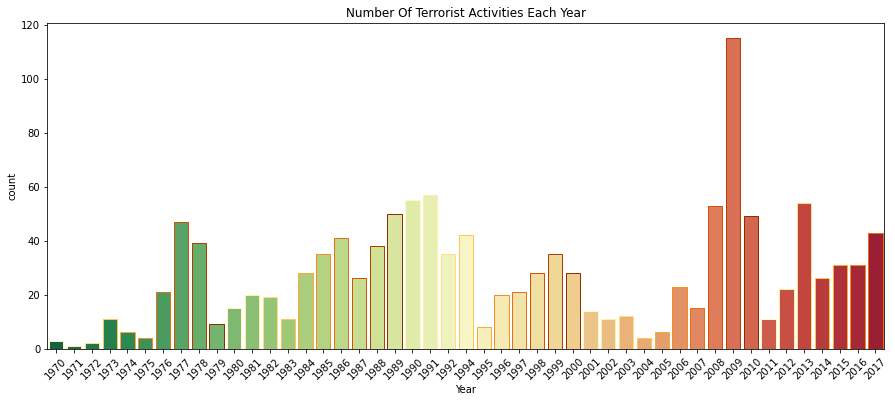

In [28]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror_gr,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=45)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

C:\Users\georg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



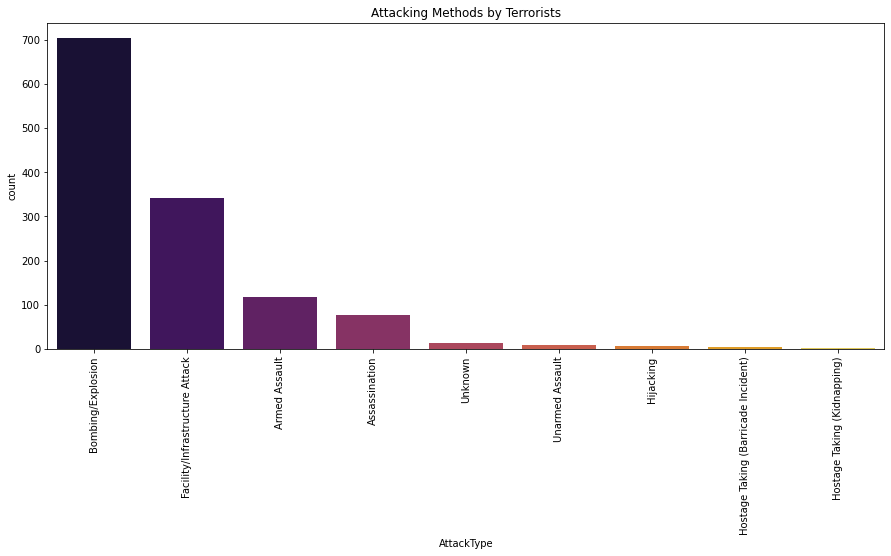

In [29]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=terror_gr,palette='inferno',order=terror_gr['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

C:\Users\georg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



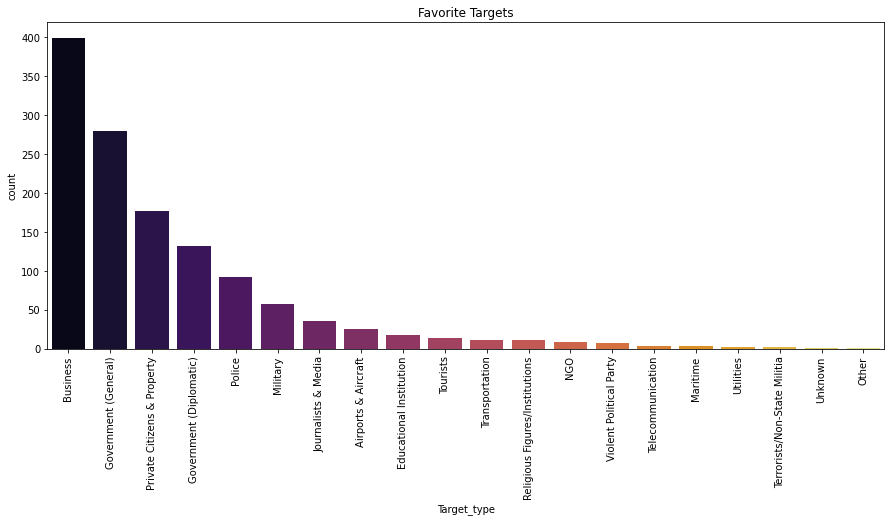

In [30]:
plt.subplots(figsize=(15,6))
sns.countplot(terror_gr['Target_type'],palette='inferno',order=terror_gr['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

C:\Users\georg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



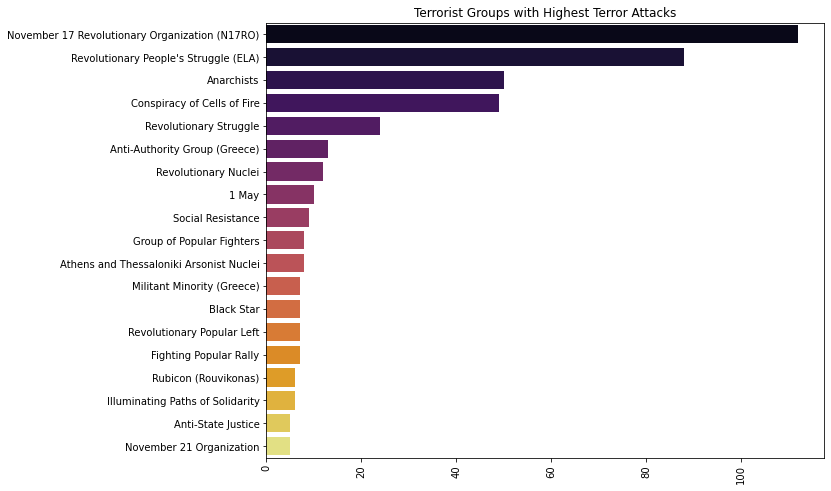

In [31]:
sns.barplot(terror_gr['Group'].value_counts()[1:20].values,terror_gr['Group'].value_counts()[1:20].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

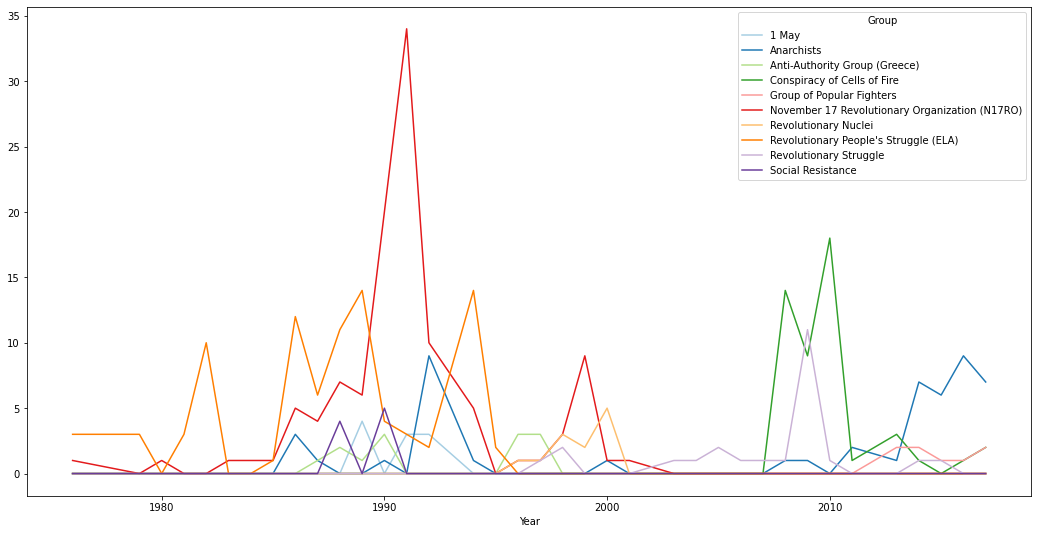

In [32]:
top_groups10=terror_gr[terror_gr['Group'].isin(terror_gr['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,9)
plt.show()

Στο παραπάνω διάγραμμα βλέπουμε το χρονικό διάστημα δράσης των 10 πιο σημαντικών τρομοκρατικών οργανώσεων στην Ελλάδα.

In [33]:
terror_gr.Group.value_counts()[1:40]

November 17 Revolutionary Organization (N17RO)        112
Revolutionary People's Struggle (ELA)                  88
Anarchists                                             50
Conspiracy of Cells of Fire                            49
Revolutionary Struggle                                 24
Anti-Authority Group (Greece)                          13
Revolutionary Nuclei                                   12
1 May                                                  10
Social Resistance                                       9
Group of Popular Fighters                               8
Athens and Thessaloniki Arsonist Nuclei                 8
Militant Minority (Greece)                              7
Black Star                                              7
Revolutionary Popular Left                              7
Fighting Popular Rally                                  7
Rubicon (Rouvikonas)                                    6
Illuminating Paths of Solidarity                        6
Anti-State Jus

In [34]:
top40 = terror_gr.sort_values(by='Casualities',ascending=False)[:40]
heat=top40.pivot_table(index='Group',columns='Year',values='Casualities')
heat.fillna(0,inplace=True)
heat.head(40)

Year                                                1973  1974  1979  1980  \
Group                                                                        
Abu Nidal Organization (ANO)                         0.0   0.0   0.0   0.0   
Anti-Authority Group (Greece)                        0.0   0.0   0.0   0.0   
Arab Revolutionary Cells                             0.0   0.0   0.0   0.0   
Armenian Secret Army for the Liberation of Armenia   0.0   0.0   0.0   4.0   
Black September                                     60.0   0.0   0.0   0.0   
Black September II                                   0.0   0.0   0.0   0.0   
Blue Archer Group                                    0.0   0.0   0.0   0.0   
Hezbollah                                            0.0   0.0   0.0   0.0   
National Front (Greece)                              0.0   0.0   0.0   0.0   
November 17 Revolutionary Organization (N17RO)       0.0   0.0   0.0   0.0   
November 21 Organization                             0.0   0.0   0.0   0.0   
Popular Front for the Liberation of Palestine (...   0.0   0.0   0.0   0.0   
Popular Front for the Liberation of Palestine, ...   0.0  88.0   0.0   0.0   
Revolutionary Militant Left organization             0.0   0.0   0.0   0.0   
Revolutionary People's Struggle (ELA)                0.0   0.0   5.0   0.0   
Revolutionary Solidarity                             0.0   0.0   0.0   0.0   
Unknown                                              0.0   0.0   0.0   0.0   

Year                                                1981  1984  1985  1986  \
Group                                                                        
Abu Nidal Organization (ANO)                         0.0  80.0  87.0   0.0   
Anti-Authority Group (Greece)                        0.0   0.0   0.0   0.0   
Arab Revolutionary Cells                             0.0   0.0   0.0  13.0   
Armenian Secret Army for the Liberation of Armenia   0.0   0.0   0.0   0.0   
Black September                                      0.0   0.0   0.0   0.0   
Black September II                                   0.0   0.0  10.5   0.0   
Blue Archer Group                                    4.0   0.0   0.0   0.0   
Hezbollah                                            0.0   0.0   0.0   0.0   
National Front (Greece)                              0.0   0.0  80.0   0.0   
November 17 Revolutionary Organization (N17RO)       0.0   0.0  16.0   0.0   
November 21 Organization                             0.0   3.0   0.0   0.0   
Popular Front for the Liberation of Palestine (...  72.0   0.0   0.0   0.0   
Popular Front for the Liberation of Palestine, ...   0.0   0.0   0.0   0.0   
Revolutionary Militant Left organization             0.0   0.0  11.0   0.0   
Revolutionary People's Struggle (ELA)                0.0   0.0   0.0   0.0   
Revolutionary Solidarity                             0.0   0.0   0.0   0.0   
Unknown                                              0.0   0.0   5.0   0.0   

Year                                                1987  1988  1990  \
Group                                                                  
Abu Nidal Organization (ANO)                         0.0   0.0   0.0   
Anti-Authority Group (Greece)                        5.0   0.0   0.0   
Arab Revolutionary Cells                             0.0   0.0   0.0   
Armenian Secret Army for the Liberation of Armenia   0.0   0.0   0.0   
Black September                                      0.0   0.0   0.0   
Black September II                                   0.0   0.0   0.0   
Blue Archer Group                                    0.0   0.0   0.0   
Hezbollah                                            0.0  90.0   0.0   
National Front (Greece)                              0.0   0.0   0.0   
November 17 Revolutionary Organization (N17RO)      14.5   0.0   0.0   
November 21 Organization                             0.0   0.0   0.0   
Popular Front for the Liberation of Palestine (...   0.0   0.0   0.0   
Popular Front for the Libe

In [35]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in Greece from 1970 to 2017',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

Στο παραπάνω διάγραμμα έχουμε έναν heatmap με τα τρομοκρατικά χτυπήματα με τα περισσότερα θύματα και την χρονιά που συνέβησαν. 

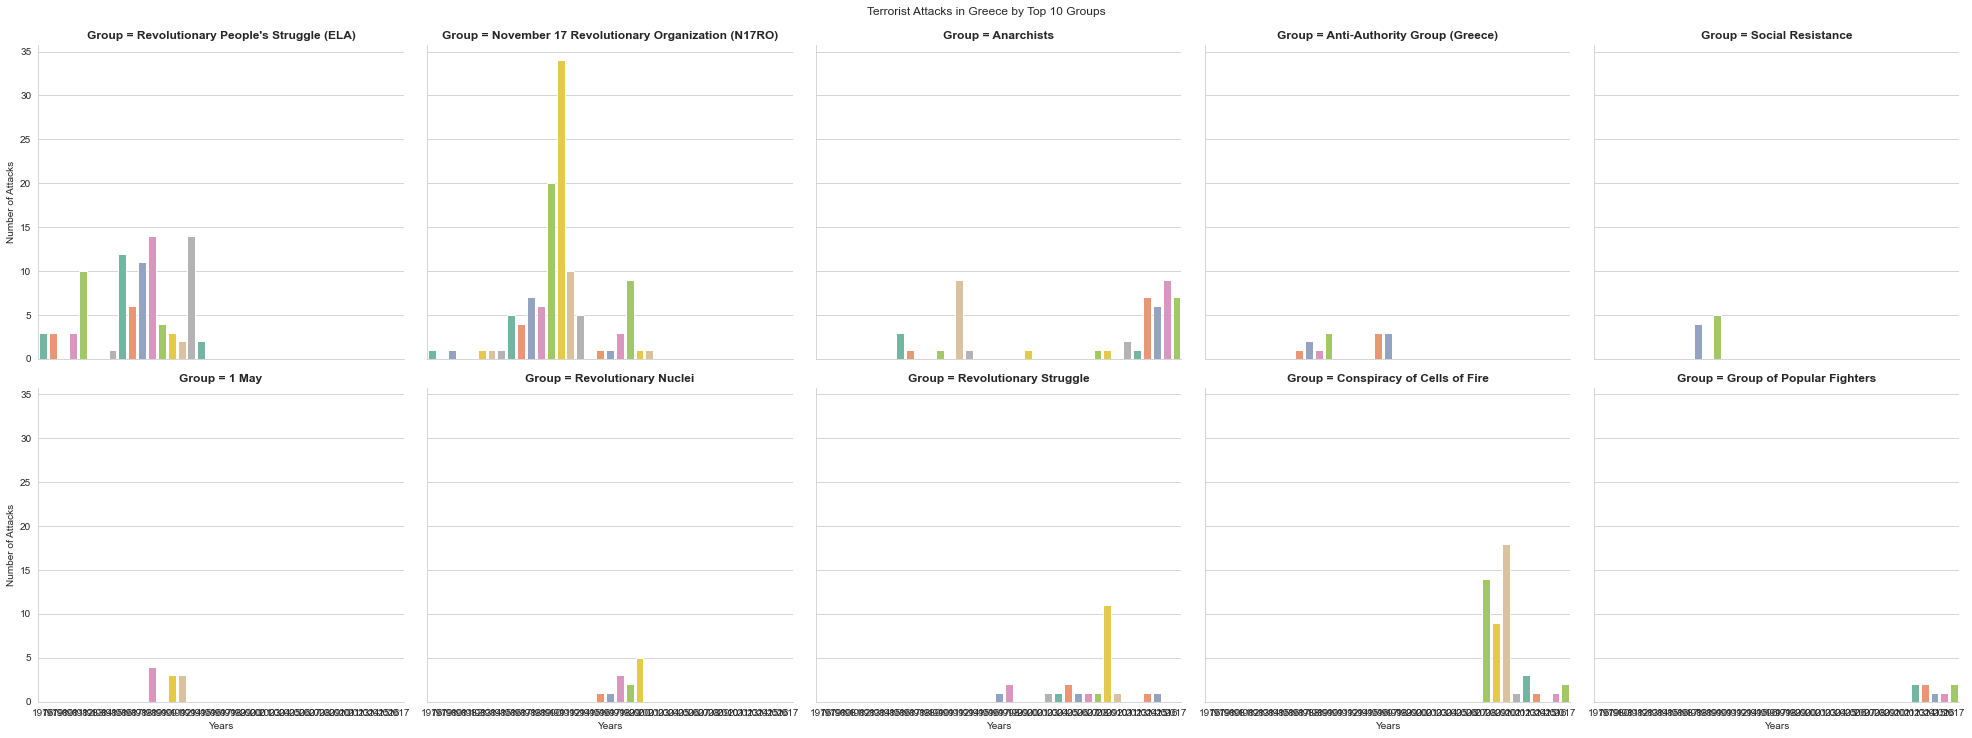

In [36]:
# Filter the data to exclude the 'Unknown' group
filtered_data = terror_gr[terror_gr['Group'] != 'Unknown']

# Get the top 10 groups based on the number of attacks
top_10_groups = filtered_data['Group'].value_counts().nlargest(10).index

# Filter the data to include only the top 10 groups
filtered_data_top_10 = filtered_data[filtered_data['Group'].isin(top_10_groups)]

# Set the plot style
sns.set_style("whitegrid")

# Create the plot
plot = sns.catplot(x="Year", kind="count", col="Group", col_wrap=5, data=filtered_data_top_10, height=5, aspect=1.1, palette="Set2")

# Set plot labels and titles
plot.set_axis_labels("Years", "Number of Attacks")
plot.fig.suptitle("Terrorist Attacks in Greece by Top 10 Groups", y=1.02)

# Adjust subplot titles
for ax in plot.axes.flat:
    ax.set_title(ax.get_title(), fontweight='bold')

# Show the plot
plt.show()


In [37]:
row_index = terror_gr.loc[(terror_gr['Group'] == 'November 17 Revolutionary Organization (N17RO)'), 'Killed'].idxmax()
row = terror_gr.loc[row_index]
print(row.to_frame())

                                                      46167
Year                                                   1991
Month                                                     4
Day                                                      19
Country                                              Greece
Region                                       Western Europe
city                                                 Patras
latitude                                          38.254465
longitude                                         21.737066
AttackType                                Bombing/Explosion
Killed                                                  7.0
Wounded                                                 6.0
Target                                 Air Courier Services
Summary                                                 NaN
Group        November 17 Revolutionary Organization (N17RO)
Target_type                             Airports & Aircraft
Weapon_type                             

In [38]:
row_index = terror_gr.loc[(terror_gr['Group'] == 'Revolutionary Struggle') & (terror_gr['Year'] != 2014), 'Killed'].idxmax()
row = terror_gr.loc[row_index]
print(row.to_frame())

                                                         97036
Year                                                      2010
Month                                                        6
Day                                                         24
Country                                                 Greece
Region                                          Western Europe
city                                                    Athens
latitude                                              37.99749
longitude                                            23.762728
AttackType                                   Bombing/Explosion
Killed                                                     1.0
Wounded                                                    0.0
Target       The offices of the Ministry of Citizen Protection
Summary      06/24/2010: On Thursday evening at 2015, in At...
Group                                   Revolutionary Struggle
Target_type                               Government (G

Με τις παραπάνω 2 εντολές κάνουμε ένα φιλτράρισμα στα δεδομένα μας , ψάχνωντας την επίθεση με τα περισσότερα θύματα ανά οργάνωση και ανά έτος. 

In [39]:
terror_gr['AttackCount'] = terror_gr.AttackType.groupby(terror_gr.AttackType).transform('count')

#Creating new Dataframe to get only Attack Type and AttackCount and dropping duplicates from Attack Type
terror_gr1 = terror_gr.copy()
terror_gr2 = terror_gr1[['AttackType','AttackCount']]
terror_gr3 = terror_gr2.drop_duplicates(keep='first')

#Pie Chart
fig = px.pie(terror_gr3, values="AttackCount",
             names="AttackType",title='Terrorist Attack Types',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

C:\Users\georg\AppData\Local\Temp/ipykernel_27892/2797300557.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Στο παραπάνω διάγραμμα απεικονίζεται με ποσοστά το είδος των επιθέσεων που έχουν λάβει χώρα σε ελληνικό έδαφος. Βλέπουμε ότι το 55.1% είναι βομβιστικές επιθέσεις, το 26.7% επιθέσεις σε υποδομές και εγκαταστάσεις και το 9.25 σε ένοπλες επιθέσεις (ληστείες). Μόλις το 5,96% πρόκειται για δολοφονίες ή απόπειρες δολοφονιών.  
Συμπεραίνεται λοιπόν ότι οι περισσότερες ενέργειες, ως πράξεις πολιτικής βίας, στην πλειοψηφία των περιπτώσεων έχουν ως στόχο την κοινωνική εξέγερση και την πολιτική αποσταθεροποίση και όχι την δημιουργία θυμάτων.

In [40]:
import folium
import pandas as pd

# Create a map centered on a specific location
map = folium.Map(location=[0, 0], zoom_start=2)

# Filter out rows with missing latitude or longitude values
filtered_data = terror_gr.dropna(subset=['latitude', 'longitude'])

# Iterate through each row in the DataFrame and add markers to the map
for index, row in filtered_data.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    attack_type = row['AttackType']
    attack_info = row['Target']
    attack_group = row['Group']
    attack_summary = row['Summary']
    
    # Create a marker for each attack
    popup_html = f"<strong>Attack Type:</strong> {attack_type}<br>"
    popup_html += f"<strong>Attack Info:</strong> {attack_info}<br>"
    popup_html += f"<strong>Attack Group:</strong> {attack_group}<br>"
    popup_html += f"<strong>Summary:</strong> {attack_summary}"
    
    folium.Marker([lat, lon], popup=folium.Popup(popup_html)).add_to(map)

# Display the map
map


Στον παραπάνω χάρτη βλέπουμε αποτυπωμένες σε χάρτη όλες τις τρομοκρατικές επιθέσεις.Παρατηρούμε ότι οι πλειοψηφία των τρομοκρατικών επιθέσεων επικεντρώνεται στην Αθήνα καθώς και σε άλλα αστικά κέντρα, αφού εκεί βρίσκονται οι περισσότεροι στόχοι πολιτικού, διπλωματικού, οικονομικού και επιχειρηματικού ενδιαφέροντος.

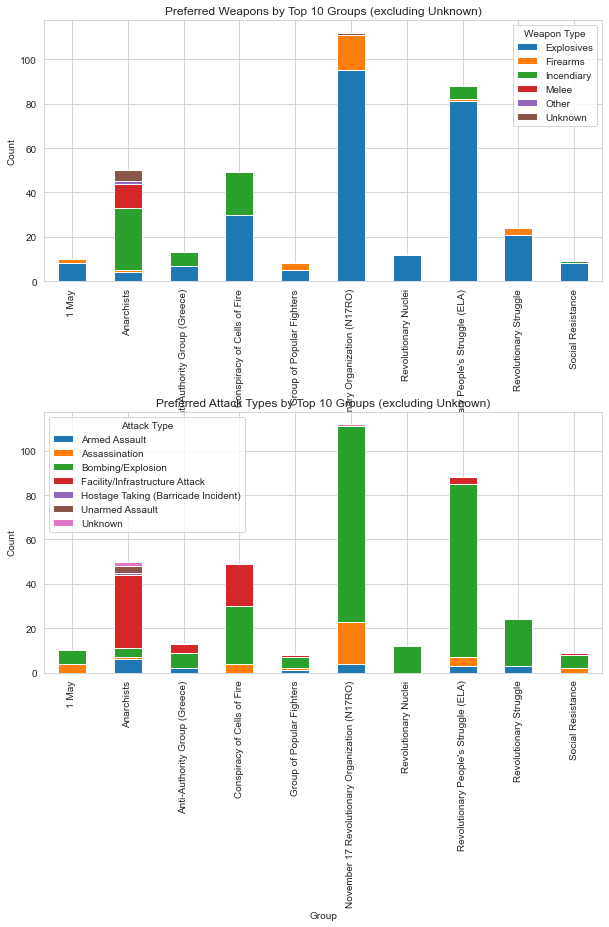

In [41]:
import matplotlib.pyplot as plt

# Filter out the rows with the "Unknown" group
filtered_data = terror_gr[terror_gr['Group'] != 'Unknown']

# Calculate the count of incidents for each group
group_counts = filtered_data['Group'].value_counts()

# Get the top 10 groups
top_10_groups = group_counts.head(10).index

# Filter the data for the top 10 groups
top_10_data = filtered_data[filtered_data['Group'].isin(top_10_groups)]

# Calculate the count of each weapon type within the top 10 groups
weapon_counts = top_10_data.groupby('Group')['Weapon_type'].value_counts().unstack()

# Calculate the count of each attack type within the top 10 groups
attack_counts = top_10_data.groupby('Group')['AttackType'].value_counts().unstack()

# Plot the results
fig, axes = plt.subplots(nrows=2, figsize=(10, 12))

weapon_counts.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_xlabel('Group')
axes[0].set_ylabel('Count')
axes[0].legend(title='Weapon Type')
axes[0].set_title('Preferred Weapons by Top 10 Groups (excluding Unknown)')

attack_counts.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_xlabel('Group')
axes[1].set_ylabel('Count')
axes[1].legend(title='Attack Type')
axes[1].set_title('Preferred Attack Types by Top 10 Groups (excluding Unknown)')

plt.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing between subplots

plt.show()

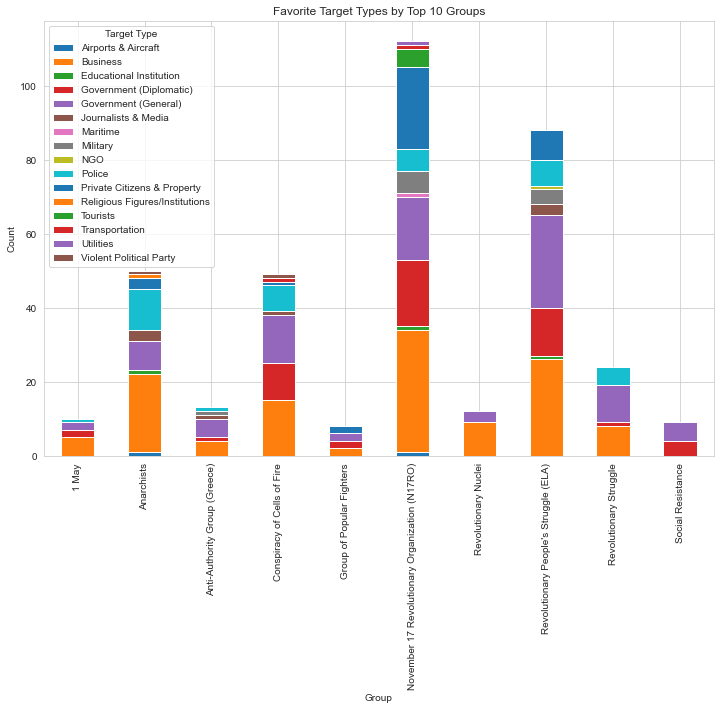

In [42]:
import matplotlib.pyplot as plt

# Calculate the count of each target type within the top 10 groups
target_counts = top_10_data.groupby('Group')['Target_type'].value_counts().unstack()

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))

target_counts.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Group')
ax.set_ylabel('Count')
ax.legend(title='Target Type')
ax.set_title('Favorite Target Types by Top 10 Groups')

plt.show()

Στη συνέχεια, θα δούμε ξεχωριστά τη δράση των 4 πιο σημαντικών ελληνικών τρομοκρατικών οργανώσεων και θα προσπαθήσουμε να αναλύσουμε τον τρόπο δράσης τους ώστε να εξαχθούν κάποια χρήσιμα συμπεράσματα στρατηγικής σημασίας. 

## Conspiracy of Cells of Fire (Συνομωσία Πυρήνων της Φωτιάς)

In [43]:
ccf = terror_gr[terror_gr['Group'] == 'Conspiracy of Cells of Fire']
ccf.head(50)

Year  Month  Day Country          Region          city   latitude  \
85777   2008      2   21  Greece  Western Europe        Athens  37.997490   
85778   2008      2   21  Greece  Western Europe        Athens  37.997490   
85779   2008      2   21  Greece  Western Europe        Athens  37.997490   
85780   2008      2   21  Greece  Western Europe        Athens  37.997490   
85781   2008      2   21  Greece  Western Europe       Piraeus  37.942925   
85782   2008      2   21  Greece  Western Europe       Piraeus  37.942925   
85783   2008      2   21  Greece  Western Europe        Athens  37.997490   
85784   2008      2   21  Greece  Western Europe        Athens  37.997490   
85785   2008      2   21  Greece  Western Europe        Athens  37.997490   
85786   2008      2   21  Greece  Western Europe        Athens  37.997490   
85787   2008      2   21  Greece  Western Europe       Piraeus  37.942925   
85788   2008      2   21  Greece  Western Europe        Athens  37.997490   
85789   2008      2   21  Greece  Western Europe        Athens  37.997490   
89748   2008     12    3  Greece  Western Europe        Athens  37.997490   
90706   2009      2   12  Greece  Western Europe        Athens  37.997490   
90707   2009      2   12  Greece  Western Europe        Athens  37.997490   
90708   2009      2   12  Greece  Western Europe        Athens  37.997490   
91976   2009      5   19  Greece  Western Europe        Athens  37.997490   
91977   2009      5   19  Greece  Western Europe   Stavroupoli  40.666225   
92531   2009      6   27  Greece  Western Europe        Athens  37.997490   
92726   2009      7   11  Greece  Western Europe        Athens  37.997490   
93794   2009     10    2  Greece  Western Europe        Athens  37.997490   
94345   2009     11   13  Greece  Western Europe        Athens  37.997490   
94912   2010      1    9  Greece  Western Europe        Athens  37.997490   
95769   2010      3   19  Greece  Western Europe        Athens  37.997490   
95773   2010      3   20  Greece  Western Europe        Athens  37.997490   
95774   2010      3   20  Greece  Western Europe        Athens  37.997490   
96467   2010      5   13  Greece  Western Europe    Korydallos  37.984379   
96493   2010      5   14  Greece  Western Europe  Thessaloniki  40.620663   
98854   2010     11    1  Greece  Western Europe        Athens  37.997490   
98855   2010     11    1  Greece  Western Europe        Athens  37.997490   
98856   2010     11    1  Greece  Western Europe        Athens  37.997490   
98857   2010     11    1  Greece  Western Europe        Athens  37.997490   
98880   2010     11    2  Greece  Western Europe        Athens  37.997490   
98881   2010     11    2  Greece  Western Europe        Athens  37.997490   
98882   2010     11    2  Greece  Western Europe        Athens  37.997490   
98884   2010     11    2  Greece  Western Europe        Athens  37.997490   
98885   2010     11    2  Greece  Western Europe        Athens  37.997490   
98886   2010     11    2  Greece  Western Europe        Athens  37.935647   
98934   2010     11    4  Greece  Western Europe        Athens  37.997490   
99696   2010     12   30  Greece  Western Europe        Athens  37.997490   
103420  2011     10   12  Greece  Western Europe        Athens  37.997490   
117884  2013      6    7  Greece  Western Europe        Athens  37.997490   
118663  2013      7    3  Greece  Western Europe        Athens  37.997490   
120811  2013      9    1  Greece  Western Europe        Athens  37.997490   
131032  2014      4   29  Greece  Western Europe          Itea  38.432493   
168022  2016     10   12  Greece  Western Europe        Athens  37.997490   
173142  2017      3   20  Greece  Western Europe      Kryoneri  38.142222   
175222  2017      5   25  Greece  Western Europe        Athens  37.997490   

        longitude                      AttackType  Killed  Wounded  \
85777   23.762728  Facility/Infrastructure Attack     0.0      NaN   
85778   23.762728

In [44]:
ccf_killed = ccf['Killed'].sum()
ccf_wounded = ccf['Wounded'].sum()

print("Total Number of Casualities")
print("Total Killed:", ccf_killed)
print("Total Wounded:", ccf_wounded)

Total Number of Casualities
Total Killed: 0.0
Total Wounded: 7.0


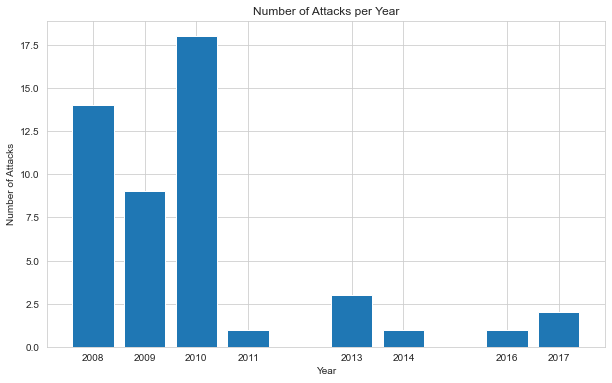

In [45]:
# Count the number of attacks per year
attacks_per_year = ccf['Year'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(attacks_per_year.index, attacks_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks per Year')
plt.xticks(attacks_per_year.index)
plt.show()

Στο παραπάνω διάγραμμα βλέπουμε τον αριθμό επιθέσεων της Συνομωσίας Πυρήνων της Φωτιάς, από την αρχή της δράσης τους και με την πάροδο του χρόνου. 
Η ίδρυση της παραπάνω ομάδας έγινε σε εποχή έντονων κοινωνικών και πολιτικών διαταραχών, που ακολούθησαν τη δολοφονία  Γρηγορόπουλου. Τις χρονιές 2008 ~ 2010, παρατηρείται μια έντονη δράση, καθώς η οργάνωση αποτελούνταν από νεαρά άτομα τα οποία ήταν άγνωστα στις αρχές. Το γεγονός ότι οι επιθέσεις ήταν πάρα πολλές σε μικρό χρονικό διάστημα, οδήγησε τα επιχειρησιακά μέλη σε κρίσιμα λάθη αφού δεν είχαν γίνει οι απαιτούμενες προπαρασκευαστικές ενέργειες και η κατάλληλη προετοιμασία αυτών των ενεργειών. 
Η αμέσως μειούμενη δράση τους είναι συνέπεια των κρισιμών λαθών που άφησαν πολλά στοιχεία, καθώς και στην αποτελεσματικότητα της Αστυνομίας που εκμεταλλέυτηκε την ύπαρξη των στοιχείων και οδήγησε στη σύλληψη ηγετικών και επιχειρησιακών μελών.  
Παρ΄όλα αυτά, βλέπουμε ότι η δράση τους συνεχίστηκε σε πολύ μικρότερο βαθμό τα έτη 2013, 2014, 2016 και 2017. Σε αυτό βοήθησε η στρατολόγηση νέων μελών καθώς και η ενεργοποίηση θυλάκων που δεν βρισκόταν στη φυλακή.

C:\Users\georg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



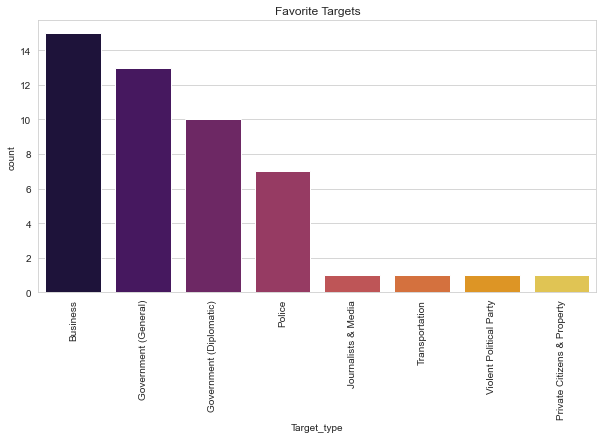

In [46]:
plt.subplots(figsize=(10,5))
sns.countplot(ccf['Target_type'],palette='inferno',order=ccf['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

<Figure size 720x360 with 0 Axes>

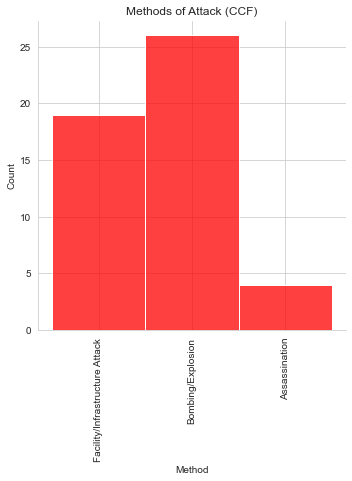

<Figure size 720x360 with 0 Axes>

In [47]:
sns.displot(ccf['AttackType'],color='red')
plt.xticks(rotation=90)
plt.xlabel('Method')
plt.title('Methods of Attack (CCF)')
plt.figure(figsize=(10,5))

In [48]:
map = folium.Map(location=[0, 0], zoom_start=2)

# Filter out rows with missing latitude or longitude values
filtered_data = ccf.dropna(subset=['latitude', 'longitude'])

# Iterate through each row in the DataFrame and add markers to the map
for index, row in filtered_data.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    attack_type = row['AttackType']
    attack_info = row['Target']
    attack_group = row['Group']
    attack_summary = row['Summary']
    
    # Create a marker for each attack
    popup_html = f"<strong>Attack Type:</strong> {attack_type}<br>"
    popup_html += f"<strong>Attack Info:</strong> {attack_info}<br>"
    popup_html += f"<strong>Attack Group:</strong> {attack_group}<br>"
    popup_html += f"<strong>Summary:</strong> {attack_summary}"
    
    folium.Marker([lat, lon], popup=folium.Popup(popup_html)).add_to(map)

# Display the map
map

## Revolutionary Struggle (Επαναστατικός Αγώνας)

In [49]:
revst = terror_gr[terror_gr['Group'] == "Revolutionary Struggle"]
revst

Year  Month  Day Country          Region          city   latitude  \
66913   1997     10   19  Greece  Western Europe        Athens  37.997490   
67933   1998      7   13  Greece  Western Europe        Athens  37.997490   
67934   1998      7   13  Greece  Western Europe        Athens  37.997490   
75858   2003      9    5  Greece  Western Europe        Athens  37.997490   
76482   2004      5    5  Greece  Western Europe        Athens  37.997490   
78226   2005      6    2  Greece  Western Europe        Athens  37.997490   
79270   2005     12   12  Greece  Western Europe        Athens  37.997490   
80798   2006      5   30  Greece  Western Europe        Athens  37.997490   
82155   2007      1   12  Greece  Western Europe        Athens  37.997490   
89171   2008     10   24  Greece  Western Europe        Athens  37.997490   
90235   2009      1    5  Greece  Western Europe        Athens  37.997490   
90573   2009      2    3  Greece  Western Europe    Korydallos  37.984379   
90589   2009      2    3  Greece  Western Europe    Korydallos  37.984379   
90798   2009      2   18  Greece  Western Europe        Athens  37.997490   
90986   2009      3    9  Greece  Western Europe        Athens  37.997490   
91005   2009      3   10  Greece  Western Europe        Athens  37.997490   
91129   2009      3   19  Greece  Western Europe        Athens  37.997490   
91443   2009      4   11  Greece  Western Europe        Athens  37.997490   
92607   2009      7    3  Greece  Western Europe        Athens  37.997490   
93451   2009      9    2  Greece  Western Europe        Athens  37.997490   
93452   2009      9    2  Greece  Western Europe  Thessaloniki  40.620663   
97036   2010      6   24  Greece  Western Europe        Athens  37.997490   
130135  2014      4   10  Greece  Western Europe        Athens  37.997490   
146103  2015      3   28  Greece  Western Europe        Athens  37.997490   

        longitude         AttackType  Killed  Wounded  \
66913   23.762728  Bombing/Explosion     0.0      0.0   
67933   23.762728  Bombing/Explosion     0.0      0.0   
67934   23.762728  Bombing/Explosion     0.0      0.0   
75858   23.762728  Bombing/Explosion     0.0      2.0   
76482   23.762728  Bombing/Explosion     0.0      0.0   
78226   23.762728  Bombing/Explosion     0.0      0.0   
79270   23.762728  Bombing/Explosion     0.0      3.0   
80798   23.762728  Bombing/Explosion     0.0      0.0   
82155   23.762728  Bombing/Explosion     0.0      0.0   
89171   23.762728  Bombing/Explosion     0.0      0.0   
90235   23.762728      Armed Assault     0.0      1.0   
90573   23.649458      Armed Assault     0.0      0.0   
90589   23.649458      Armed Assault     0.0      0.0   
90798   23.762728  Bombing/Explosion     0.0      0.0   
90986   23.762728  Bombing/Explosion     0.0      0.0   
91005   23.762728  Bombing/Explosion     0.0      0.0   
91129   23.762728  Bombing/Explosion     0.0      0.0   
91443   23.762728  Bombing/Explosion     0.0      0.0   
92607   23.762728  Bombing/Explosion     0.0      0.0   
93451   23.762728  Bombing/Explosion     0.0      1.0   
93452   22.952000  Bombing/Explosion     0.0      0.0   
97036   23.762728  Bombing/Explosion     1.0      0.0   
130135  23.762728  Bombing/Explosion     0.0      0.0   
146103  23.762728  Bombing/Explosion     0.0      0.0   

                                                   Target  \
66913                                             Offices   
67933                                Athens Court Complex   
67934                                Athens Court Complex   
75858                                Courthouse in Athens   
76482   A police precinct in the Athens suburb of Kall...   
78226             Greek Labor Ministry building in Athens   
79270                     ELTA Finance Ministry in Athens   
80798                 Culture Minister George Voulgarakis   
82155                        US Embassy in Athens, Greece   
89171   The headquarters of the Royal Dutch Sh

In [50]:
revst_killed = revst['Killed'].sum()
revst_wounded = revst['Wounded'].sum()

print("Total Number of Casualities")
print("Total Killed:", revst_killed)
print("Total Wounded:", revst_wounded)

Total Number of Casualities
Total Killed: 1.0
Total Wounded: 7.0


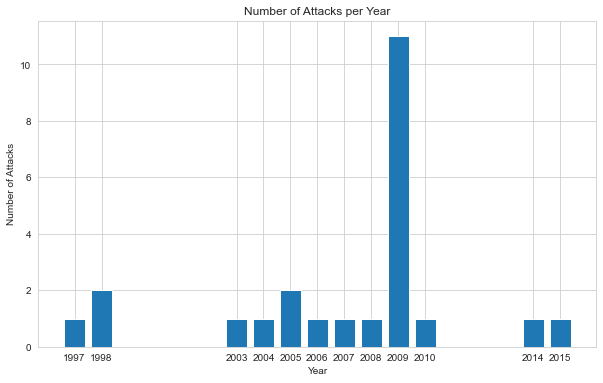

In [51]:
# Count the number of attacks per year
attacks_per_year = revst['Year'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(attacks_per_year.index, attacks_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks per Year')
plt.xticks(attacks_per_year.index)
plt.show()

Στο παραπάνω διάγραμμα βλέπουμε τις επιθέσεις του Επαναστατικού Αγώνα κατά τη διάρκεια της δράσης τους. Η δράση τους χαρακτηρίζεται από μικρό αριθμό ενεργειών στα πρώτα χρόνια της δράσης τους και σε μια παύση 5 έτων από το 1998 μέχρι το 2002. Ύστερα από την εξάρθρωση της 17 Νοέμβρη το καλοκαίρι του 2002, η οργάνωση ανέλαβε τα ηνία του επαναστατικού χώρου. Οι επιθέσεις τους από το 2003 έως και το 2008 ήταν λίγες και πολύ καλά προετοιμασμένες. Οι στόχοι τους ήταν υψηλής πολιτικής σημασίας και είχαν μεγάλο αντίκτυπο σε παγκόσμιο επίπεδο, όπως για παράδειγμα η επίθεση με ρουκέτα κατά της Αμερικάνικης Πρεσβείας το 2007. 
Η αύξηση των επιθέσεων τους το 2009 συνέπεια κοινωνικών και πολιτικών διαταραχών, σήμαινε ελάχιστη προετοιμασία των επιθέσεων και αρκετά επιχειρησιακά λάθη. Αυτό οδήγησε στη συλληψή των ηγετικών μελών της οργάνωσης το 2010. Τα ηγετικά μέλη της οργάνωσης προφυλακίστηκαν, αλλά λόγω της παρέλευσης 18μηνου αποφυλακίστηκαν το 2012 μέχρι τη διεξαγωγή της δίκης και παρέμειναν φυγάδες. Αυτό οδήγησε σε άλλα 2 χτυπήματα το 2014 και το 2015 όταν συνεληφθησαν εκ νέου και η δράση τους σταμάτησε. 

C:\Users\georg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



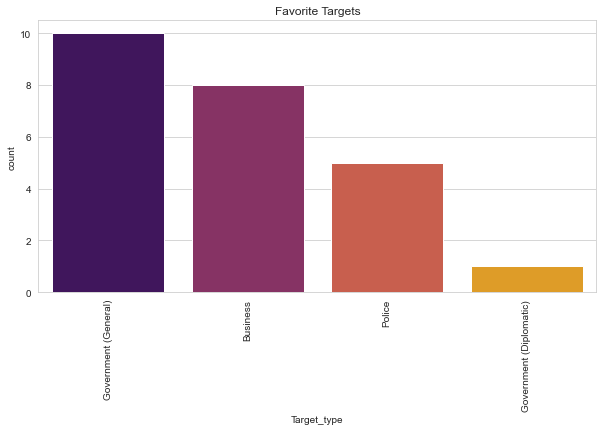

In [52]:
plt.subplots(figsize=(10,5))
sns.countplot(revst['Target_type'],palette='inferno',order=revst['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

<Figure size 720x360 with 0 Axes>

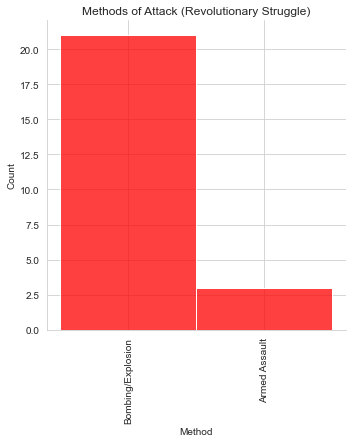

<Figure size 720x360 with 0 Axes>

In [53]:
sns.displot(revst['AttackType'],color='red')
plt.xticks(rotation=90)
plt.xlabel('Method')
plt.title('Methods of Attack (Revolutionary Struggle)')
plt.figure(figsize=(10,5))

In [54]:
map = folium.Map(location=[0, 0], zoom_start=2)

# Filter out rows with missing latitude or longitude values
filtered_data = revst.dropna(subset=['latitude', 'longitude'])

# Iterate through each row in the DataFrame and add markers to the map
for index, row in filtered_data.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    attack_type = row['AttackType']
    attack_info = row['Target']
    attack_group = row['Group']
    attack_summary = row['Summary']
    
    # Create a marker for each attack
    popup_html = f"<strong>Attack Type:</strong> {attack_type}<br>"
    popup_html += f"<strong>Attack Info:</strong> {attack_info}<br>"
    popup_html += f"<strong>Attack Group:</strong> {attack_group}<br>"
    popup_html += f"<strong>Summary:</strong> {attack_summary}"
    
    folium.Marker([lat, lon], popup=folium.Popup(popup_html)).add_to(map)

# Display the map66
map

## November 17 Revolutionary Organization (Επαναστατική Οργάνωση - 17 Νοέμβρη)

In [55]:
n17ro = terror_gr[terror_gr['Group'] == "November 17 Revolutionary Organization (N17RO)"]
n17ro.head(30)

Year  Month  Day Country          Region    city  latitude  longitude  \
4381   1976     12   14  Greece  Western Europe  Athens  37.99749  23.762728   
10017  1980      1   16  Greece  Western Europe  Athens  37.99749  23.762728   
20273  1983     11   15  Greece  Western Europe  Athens  37.99749  23.762728   
21567  1984      4    3  Greece  Western Europe  Athens  37.99749  23.762728   
26738  1985     11   26  Greece  Western Europe  Athens  37.99749  23.762728   
27808  1986      4    8  Greece  Western Europe  Athens  37.99749  23.762728   
29295  1986     10    5  Greece  Western Europe  Athens  37.99749  23.762728   
29296  1986     10    5  Greece  Western Europe  Athens  37.99749  23.762728   
29297  1986     10    5  Greece  Western Europe  Athens  37.99749  23.762728   
29298  1986     10    5  Greece  Western Europe  Athens  37.99749  23.762728   
30856  1987      4   26  Greece  Western Europe  Athens  37.99749  23.762728   
31808  1987      8   10  Greece  Western Europe  Athens  37.99749  23.762728   
32305  1987     10    1  Greece  Western Europe  Athens  37.99749  23.762728   
32310  1987     10    2  Greece  Western Europe  Athens  37.99749  23.762728   
33206  1988      1   22  Greece  Western Europe  Athens  37.99749  23.762728   
33652  1988      3    1  Greece  Western Europe  Athens  37.99749  23.762728   
34527  1988      5   23  Greece  Western Europe  Athens  37.99749  23.762728   
34528  1988      5   23  Greece  Western Europe  Athens  37.99749  23.762728   
34529  1988      5   23  Greece  Western Europe  Athens  37.99749  23.762728   
34530  1988      5   23  Greece  Western Europe  Athens  37.99749  23.762728   
34903  1988      6   28  Greece  Western Europe  Athens  37.99749  23.762728   
37359  1989      2   22  Greece  Western Europe  Athens  37.99749  23.762728   
37360  1989      2   22  Greece  Western Europe  Athens  37.99749  23.762728   
37361  1989      2   22  Greece  Western Europe  Athens  37.99749  23.762728   
38190  1989      5    8  Greece  Western Europe  Athens  37.99749  23.762728   
38734  1989      6   29  Greece  Western Europe  Athens  37.99749  23.762728   
39863  1989      9   26  Greece  Western Europe  Athens  37.99749  23.762728   
41367  1990      2    3  Greece  Western Europe  Athens  37.99749  23.762728   
42510  1990      5   15  Greece  Western Europe  Athens  37.99749  23.762728   
42511  1990      5   15  Greece  Western Europe  Athens  37.99749  23.762728   

              AttackType  Killed  Wounded  \
4381       Assassination     1.0      1.0   
10017      Assassination     2.0      0.0   
20273      Assassination     2.0      0.0   
21567      Assassination     0.0      1.0   
26738  Bombing/Explosion     1.0     15.0   
27808      Assassination     1.0      0.0   
29295  Bombing/Explosion     0.0      0.0   
29296  Bombing/Explosion     0.0      0.0   
29297  Bombing/Explosion     0.0      0.0   
29298  Bombing/Explosion     0.0      0.0   
30856  Bombing/Explosion     0.0     18.0   
31808  Bombing/Explosion     0.0     11.0   
32305      Armed Assault     1.0      0.0   
32310  Bombing/Explosion     0.0      0.0   
33206  Bombing/Explosion     0.0      0.0   
33652      Assassination     1.0      0.0   
34527  Bombing/Explosion     0.0      0.0   
34528  Bombing/Explosion     0.0      0.0   
34529  Bombing/Explosion     0.0      0.0   
34530  Bombing/Explosion     0.0      0.0   
34903      Assassination     1.0      0.0   
37359  Bombing/Explosion     0.0      0.0   
37360  Bombing/Explosion     0.0      0.0   
37361  Bombing/Explosion     0.0      0.0   
38190      Assassination     0.0      3.0   
38734      Armed Assault     0.0      0.0   
39863      Assassination     1.0      0.0   
41367      Armed Assault     0.0      0.0   
42510  Bombing/Explosion     0.0      0.0   
42511  Bombing/Explosion     0.0      0.0   

                                                  Target Summary  \
4381                Evangelos Mallios, Retired Policeman     N

In [56]:
nov17_killed = n17ro['Killed'].sum()
nov17_wounded = n17ro['Wounded'].sum()

print("Total Number of Casualities")
print("Total Killed:", nov17_killed)
print("Total Wounded:", nov17_wounded)

Total Number of Casualities
Total Killed: 26.0
Total Wounded: 98.0


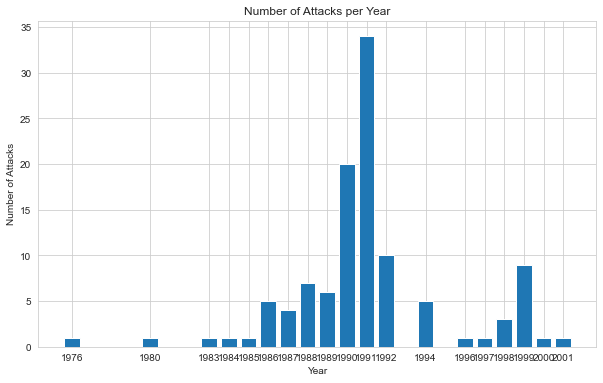

In [57]:
# Count the number of attacks per year
attacks_per_year = n17ro['Year'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(attacks_per_year.index, attacks_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks per Year')
plt.xticks(attacks_per_year.index)
plt.show()

Η 17 Νοέμβρη είναι η μεγαλύτερη επαναστατική οργάνωση που έδρασε στη χώρα μας από τη μεταπολίτευση κι έπειτα. Αυτό μας το μαρτυρά το πλήθος των επιθέσεων (112), τα 124 θύματα των επιθέσεων (26 νεκροί και 98 τραυματίες) και η πολύχρονη πορεία δράσης τους από το 1976 έως και το 2002, χρονιά την οποία εξαρθρώθηκε η οργάνωση. Η δράση της περιελάμβανε δολοφονίες, βομβιστικές επιθέσεις, αρπαγές οπλισμού και σημαντικό αριθμό ληστειών και οι στόχοι της ήταν ξένοι πολιτικοί, στρατιωτικοί, αστυνομικοί, διπλωμάτες και οικονομικοί παράγοντες. 

C:\Users\georg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



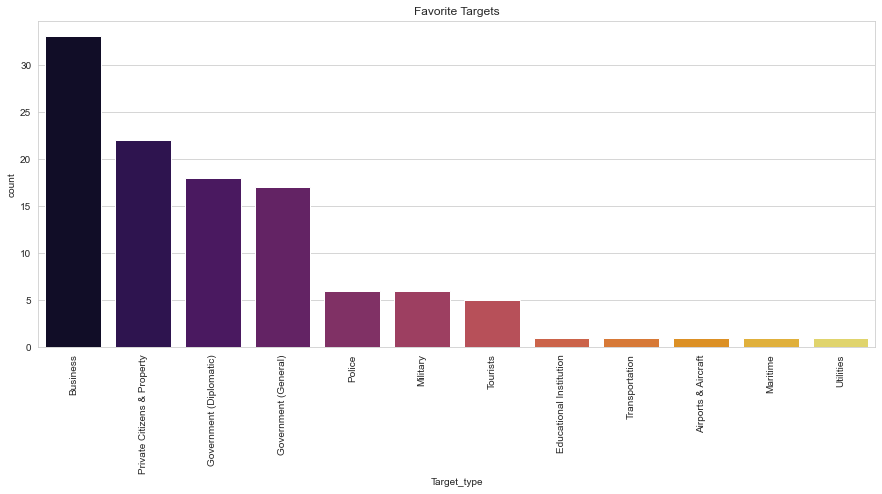

In [58]:
plt.subplots(figsize=(15,6))
sns.countplot(n17ro['Target_type'],palette='inferno',order=n17ro['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

<Figure size 720x360 with 0 Axes>

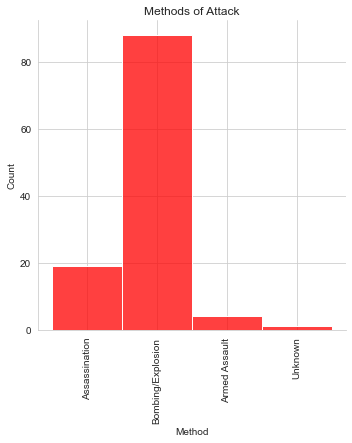

<Figure size 720x360 with 0 Axes>

In [59]:
sns.displot(n17ro['AttackType'],color='red')
plt.xticks(rotation=90)
plt.xlabel('Method')
plt.title('Methods of Attack')
plt.figure(figsize=(10,5))

In [60]:
import folium
import pandas as pd

# Create a map centered on a specific location
map = folium.Map(location=[0, 0], zoom_start=2)

# Filter out rows with missing latitude or longitude values
filtered_data = n17ro.dropna(subset=['latitude', 'longitude'])

# Iterate through each row in the DataFrame and add markers to the map
for index, row in filtered_data.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    attack_type = row['AttackType']
    attack_info = row['Target']
    attack_group = row['Group']
    attack_summary = row['Summary']
    
    # Create a marker for each attack
    popup_html = f"<strong>Attack Type:</strong> {attack_type}<br>"
    popup_html += f"<strong>Attack Info:</strong> {attack_info}<br>"
    popup_html += f"<strong>Attack Group:</strong> {attack_group}<br>"
    popup_html += f"<strong>Summary:</strong> {attack_summary}"
    
    folium.Marker([lat, lon], popup=folium.Popup(popup_html)).add_to(map)

# Display the map66
map

## Revolutionary People's Struggle (ELA) (Επαναστατικός Λαϊκός Αγώνας)

In [61]:
ela = terror_gr[terror_gr['Group'] == "Revolutionary People's Struggle (ELA)"]
ela.head(30)

Year  Month  Day Country          Region    city  latitude  longitude  \
3623   1976      2   27  Greece  Western Europe  Athens  37.99749  23.762728   
3624   1976      2   27  Greece  Western Europe  Athens  37.99749  23.762728   
4224   1976     10   14  Greece  Western Europe  Athens  37.99749  23.762728   
7492   1979      1   31  Greece  Western Europe  Athens  37.99749  23.762728   
8371   1979      5   12  Greece  Western Europe  Athens  37.99749  23.762728   
9065   1979      8   10  Greece  Western Europe  Athens  37.99749  23.762728   
13503  1981      5    8  Greece  Western Europe  Athens  37.99749  23.762728   
13504  1981      5    8  Greece  Western Europe  Athens  37.99749  23.762728   
13505  1981      5    8  Greece  Western Europe  Athens  37.99749  23.762728   
15858  1982      4    1  Greece  Western Europe  Athens  37.99749  23.762728   
16068  1982      4   27  Greece  Western Europe  Athens  37.99749  23.762728   
16357  1982      6    2  Greece  Western Europe  Athens  37.99749  23.762728   
16358  1982      6    2  Greece  Western Europe  Athens  37.99749  23.762728   
16359  1982      6    2  Greece  Western Europe  Athens  37.99749  23.762728   
16508  1982      7    2  Greece  Western Europe  Athens  37.99749  23.762728   
16509  1982      7    2  Greece  Western Europe  Athens  37.99749  23.762728   
16510  1982      7    2  Greece  Western Europe  Athens  37.99749  23.762728   
16511  1982      7    2  Greece  Western Europe  Athens  37.99749  23.762728   
16512  1982      7    2  Greece  Western Europe  Athens  37.99749  23.762728   
25619  1985      7    1  Greece  Western Europe  Athens  37.99749  23.762728   
27170  1986      1   22  Greece  Western Europe  Athens  37.99749  23.762728   
27171  1986      1   22  Greece  Western Europe  Athens  37.99749  23.762728   
27555  1986      3   18  Greece  Western Europe  Athens  37.99749  23.762728   
27636  1986      3   26  Greece  Western Europe  Athens  37.99749  23.762728   
28542  1986      6   30  Greece  Western Europe  Athens  37.99749  23.762728   
28750  1986      7   26  Greece  Western Europe  Athens  37.99749  23.762728   
28751  1986      7   26  Greece  Western Europe  Athens  37.99749  23.762728   
28764  1986      7   27  Greece  Western Europe  Athens  37.99749  23.762728   
29272  1986     10    1  Greece  Western Europe  Athens  37.99749  23.762728   
29273  1986     10    1  Greece  Western Europe  Athens  37.99749  23.762728   

                           AttackType  Killed  Wounded  \
3623                Bombing/Explosion     0.0      0.0   
3624                Bombing/Explosion     0.0      0.0   
4224   Facility/Infrastructure Attack     0.0      0.0   
7492                    Assassination     1.0      0.0   
8371                Bombing/Explosion     0.0      5.0   
9065                Bombing/Explosion     0.0      0.0   
13503               Bombing/Explosion     0.0      0.0   
13504               Bombing/Explosion     0.0      0.0   
13505               Bombing/Explosion     0.0      0.0   
15858                   Assassination     0.0      0.0   
16068                   Armed Assault     0.0      0.0   
16357               Bombing/Explosion     0.0      0.0   
16358               Bombing/Explosion     0.0      0.0   
16359                   Armed Assault     0.0      0.0   
16508               Bombing/Explosion     0.0      0.0   
16509               Bombing/Explosion     0.0      0.0   
16510               Bombing/Explosion     0.0      0.0   
16511               Bombing/Explosion     0.0      0.0   
16512               Bombing/Explosion     0.0      0.0   
25619               Bombing/Explosion     0.0      0.0   
27170               Bombing/Explosion     0.0      0.0   
27171               Bombing/Explosion     0.0      0.0   
27555               Bombing/Explosion     0.0      0.0   
27636                   Armed Assault     0.0      0.0   
28542               Bombing/Explosion     0.0      0.0   
28750             

In [62]:
ela_killed = ela['Killed'].sum()
ela_wounded = ela['Wounded'].sum()

print("Total Number of Casualities")
print("Total Killed:", ela_killed)
print("Total Wounded:", ela_wounded)

Total Number of Casualities
Total Killed: 2.0
Total Wounded: 17.0


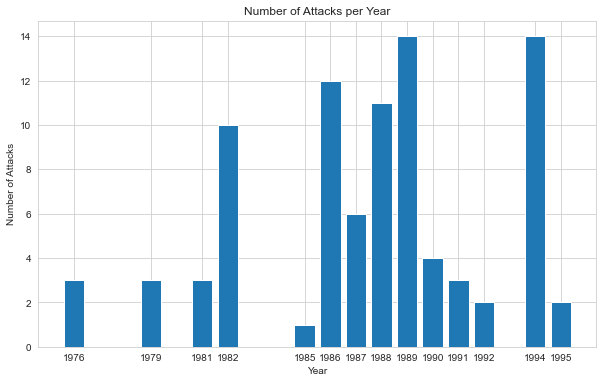

In [63]:
# Count the number of attacks per year
attacks_per_year = ela['Year'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(attacks_per_year.index, attacks_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks per Year')
plt.xticks(attacks_per_year.index)
plt.show()

Ο Επαναστατικός Λαϊκός Αγώνας έδρασε από το 1975 έως το 1995. Έθεσε τέλος στη δράση του έπειτα από τη λήψη σαφούς πολιτικής απόφασης των μελών της- και όχι εξαιτίας εξάρθρωσης της οργάνωσης.

C:\Users\georg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



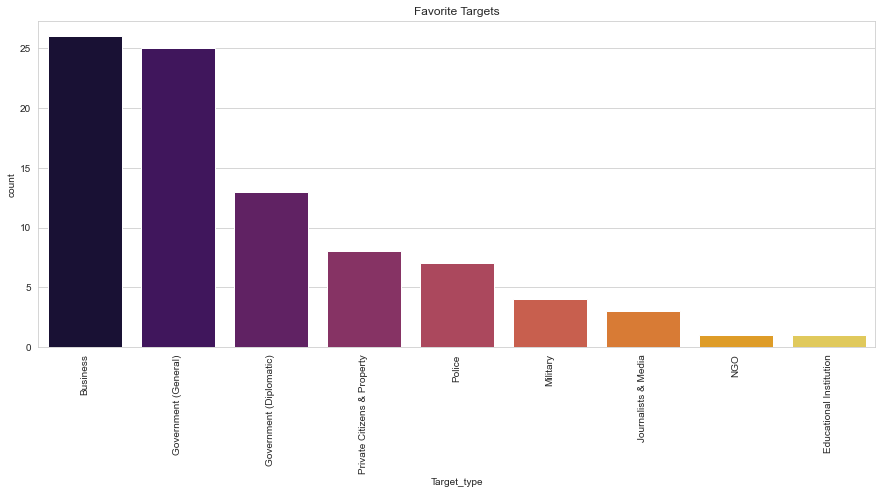

In [64]:
plt.subplots(figsize=(15,6))
sns.countplot(ela['Target_type'],palette='inferno',order=ela['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

<Figure size 720x360 with 0 Axes>

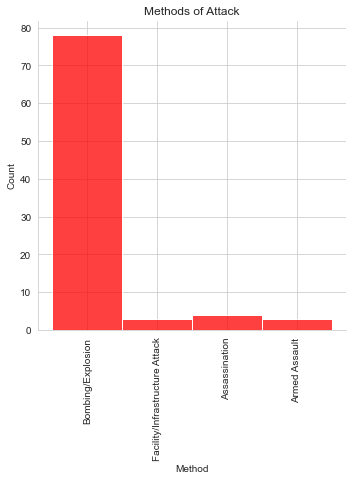

<Figure size 720x360 with 0 Axes>

In [65]:
sns.displot(ela['AttackType'],color='red')
plt.xticks(rotation=90)
plt.xlabel('Method')
plt.title('Methods of Attack')
plt.figure(figsize=(10,5))

In [66]:
map = folium.Map(location=[0, 0], zoom_start=2)

# Filter out rows with missing latitude or longitude values
filtered_data = ela.dropna(subset=['latitude', 'longitude'])

# Iterate through each row in the DataFrame and add markers to the map
for index, row in filtered_data.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    attack_type = row['AttackType']
    attack_info = row['Target']
    attack_group = row['Group']
    attack_summary = row['Summary']
    
    # Create a marker for each attack
    popup_html = f"<strong>Attack Type:</strong> {attack_type}<br>"
    popup_html += f"<strong>Attack Info:</strong> {attack_info}<br>"
    popup_html += f"<strong>Attack Group:</strong> {attack_group}<br>"
    popup_html += f"<strong>Summary:</strong> {attack_summary}"
    
    folium.Marker([lat, lon], popup=folium.Popup(popup_html)).add_to(map)

# Display the map66
map

                                                        ΤΕΛΟΣ ΕΡΓΑΣΙΑΣ